In [1]:
import sys
sys.path.append(sys.path[0] + '/bin')

In [2]:
import PyMorpionSolitaire

In [3]:
from PIL import Image

Display module information:

In [4]:
# help(PyMorpionSolitaire)

Create a new game with default type (5 points in a line, touching allowed, starting configuration 'cross'):

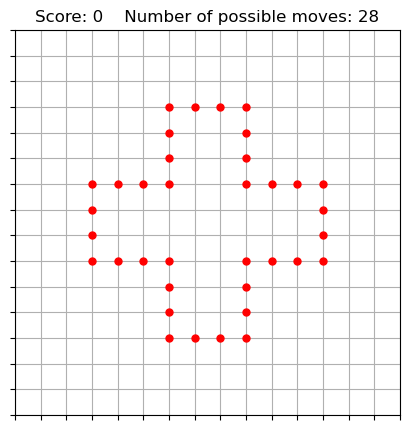

In [5]:
game = PyMorpionSolitaire.Game5T('c')
game.print()

Play a specific move:

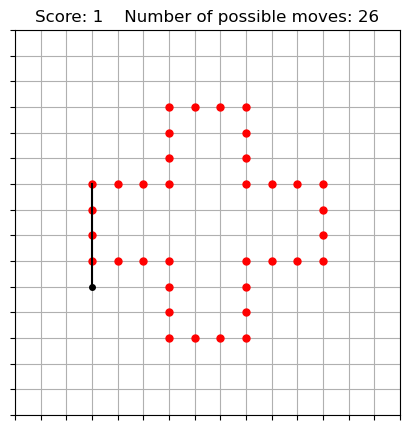

In [6]:
game.playByIndex(0)
game.print()

Play a move at random:

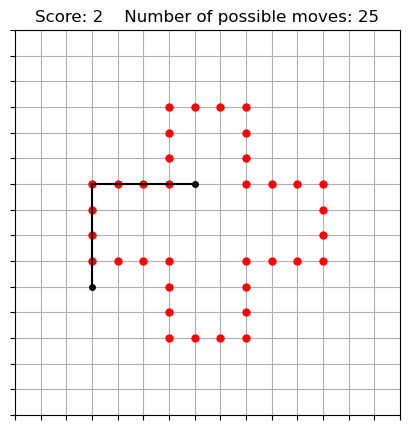

In [7]:
game.playAtRandom(1)
game.print()

Play several moves at random:

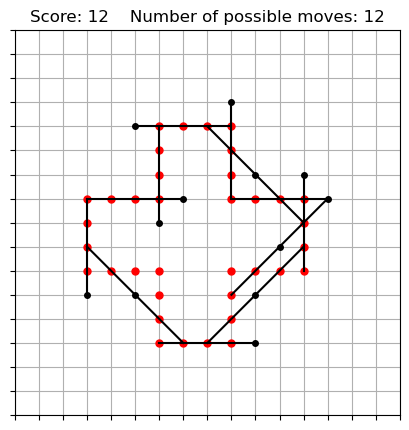

In [8]:
game.playAtRandom(10)
game.print()

Play at random until no more moves are possible:

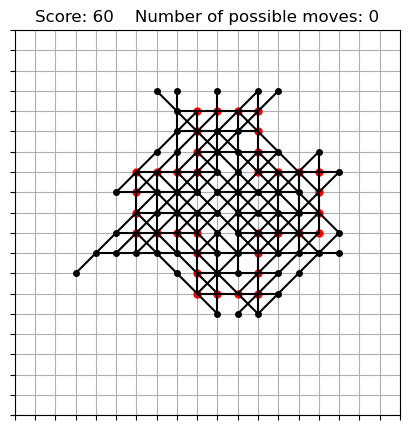

In [9]:
game.playAtRandom()
game.print()

Save game:

In [10]:
game.save('data/test_game.json')

Undo one move:

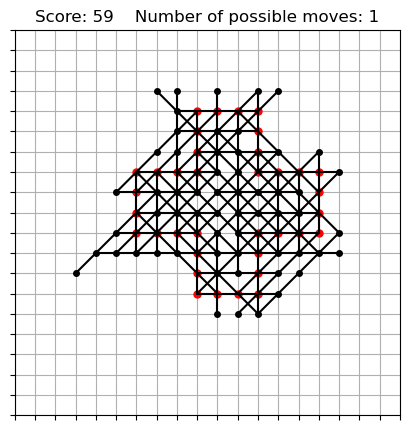

In [11]:
game.undo()
game.print()

Undo more moves:

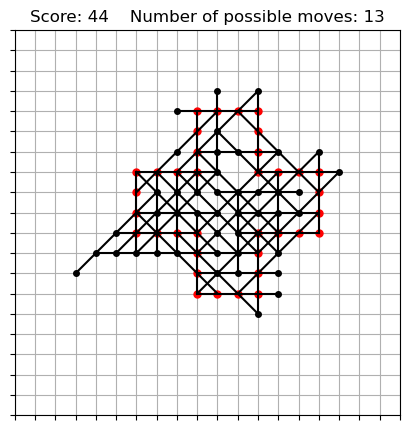

In [12]:
game.undo(15)
game.print()

Load a previously saved game:

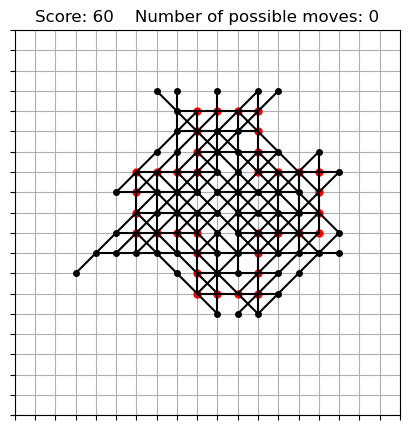

In [13]:
game = PyMorpionSolitaire.Game5T.load('data/test_game.json')
game.print()

The state of the game is stored in a boolean array of size 192 x 192:

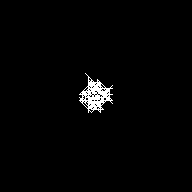

In [14]:
Image.fromarray(game.image())

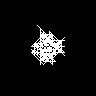

In [15]:
Image.fromarray(game.image()[48:144, 48:144])

Play using the nested Monte-Carlo algorithm:

CPU times: user 119 ms, sys: 303 µs, total: 120 ms
Wall time: 118 ms


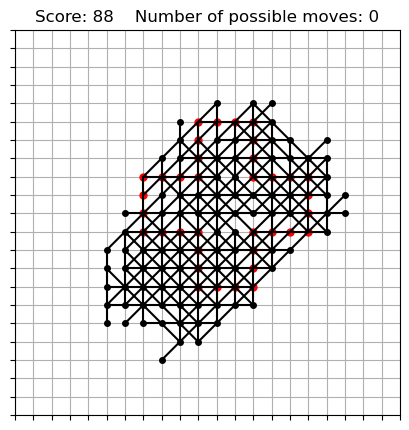

In [16]:
%%time
game.restart()
game.playNestedMC(1)
game.print()

CPU times: user 78.9 ms, sys: 172 µs, total: 79.1 ms
Wall time: 77.4 ms


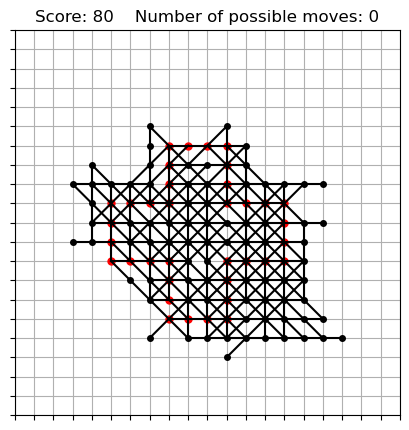

In [17]:
%%time
game.restart()
game.playFastNestedMC(1)
game.print()

CPU times: user 3.46 s, sys: 32.9 ms, total: 3.49 s
Wall time: 3.43 s


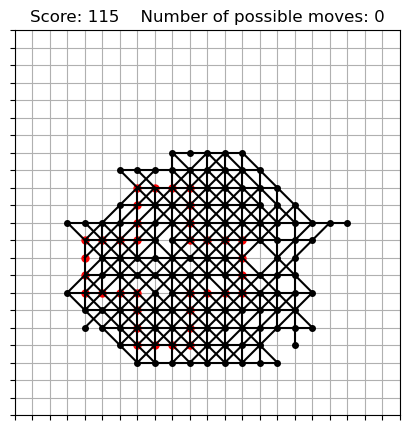

In [18]:
%%time
game.restart()
game.playNestedMC(2)
game.print()

CPU times: user 2.47 s, sys: 8.39 ms, total: 2.48 s
Wall time: 2.44 s


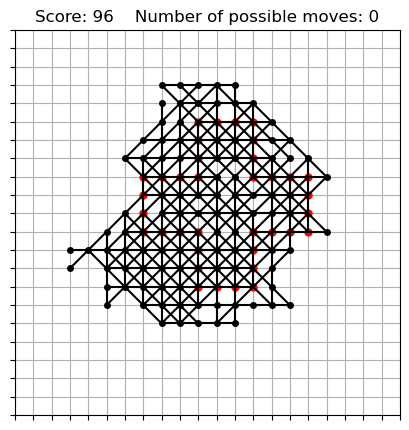

In [19]:
%%time
game.restart()
game.playFastNestedMC(2)
game.print()

In [ ]:
%%time
game.restart()
game.playNestedMC(3)
game.print()

In [ ]:
%%time
game.restart()
game.playFastNestedMC(3)
game.print()

In [16]:
# game.save('data/highest_score.json')

In [ ]:
# %%time
# game.restart()
# game.playNestedMCVariant(4)
# game.print()